In [1]:
import sys
import os

# Get the absolute path to the repo root (parent of both src and notebook folders)
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
# Add the repo root to the Python path
sys.path.append(repo_root)

# Now you can import from src
from src.master.data import load_and_crop_data
from src.master.visualize import visualize_masks

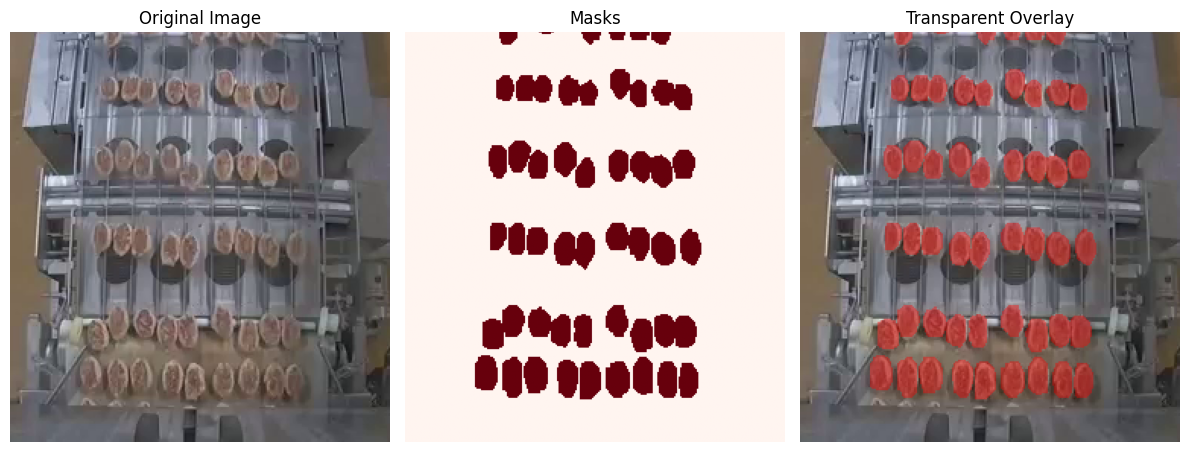

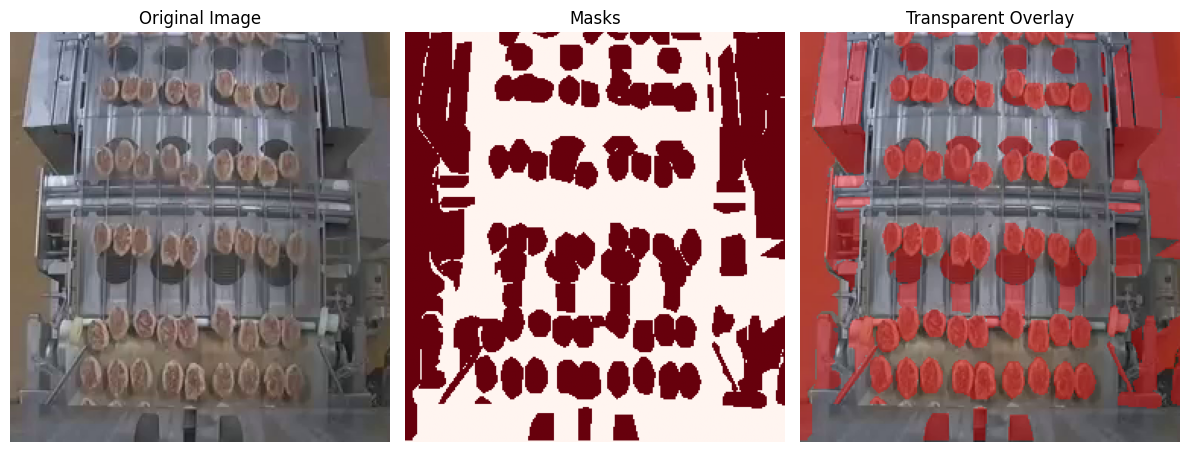

In [2]:
img_path = "C:/Users/gtoft/OneDrive/DTU/4_Semester_AS/Master_Thesis/data/sam_inference/processed_data/meatballs/images/frame_000000.PNG"
gt_path = "C:/Users/gtoft/OneDrive/DTU/4_Semester_AS/Master_Thesis/data/sam_inference/processed_data/meatballs/gt_masks/frame_000000.txt"
sam_path = "C:/Users/gtoft/OneDrive/DTU/4_Semester_AS/Master_Thesis/data/sam_inference/processed_data/meatballs/sam_masks/frame_000000.txt"

img, masks_gt = load_and_crop_data(img_path, gt_path)

img, masks_sam = load_and_crop_data(img_path, sam_path)

visualize_masks(img, masks_gt)
visualize_masks(img, masks_sam)

In [3]:
from src.master.data import KFoldSegmentationManager

# Define the dataset path
dataset_path = "C:/Users/gtoft/OneDrive/DTU/4_Semester_AS/Master_Thesis/data/sam_inference/processed_data/meatballs"

# Create dataset manager for this specific dataset
dataset_manager = KFoldSegmentationManager(
    dataset_path=dataset_path,
    class_id=0  # Class ID for this dataset
)

# Print dataset information
print(f"Dataset info: {dataset_manager.get_dataset_info()}")

# Get 5-fold cross validation dataloaders
folds = dataset_manager.get_kfold_dataloaders(k=5, batch_size=1)

# Example: Using with your embedding-classifier framework
print("\nTraining example with first fold:")
train_loader, val_loader = folds[0]

# Get training data directly in the format for classifier.fit()
train_images, train_masks, train_labels = dataset_manager.get_training_data(train_loader)

print(f"Training data prepared:")
print(f"  Images: {len(train_images)}")
print(f"  GT masks: {len(train_masks)}")
print(f"  Labels: {len(train_labels)}")

# In a real scenario, you would:
"""
# 1. Create embedding and classifier
config = {
    'clip_model': 'ViT-B/32',
    'use_PCA': True,
    'PCA_var': 0.95
}
embedding = CLIPEmbedding(config)
classifier = SVMClassifier(config, embedding)

# 2. Train classifier directly with the data
classifier.fit(train_images, train_masks, train_labels)

# 3. Get validation data for prediction
validation_data = dataset_manager.get_prediction_data(val_loader)

# 4. Evaluate on validation data
results_all = []
for image, candidate_masks in validation_data:
    # Predict with classifier
    results, probs = classifier.predict(
        image, 
        candidate_masks, 
        return_probabilities=True
    )
    results_all.extend(results)
    
# 5. Calculate validation metrics
# (precision, recall, etc.)
"""

Dataset info: {'dataset_name': 'meatballs', 'class_id': 0, 'total_samples': 200}

Training example with first fold:
Training data prepared:
  Images: 160
  GT masks: 160
  Labels: 160


"\n# 1. Create embedding and classifier\nconfig = {\n    'clip_model': 'ViT-B/32',\n    'use_PCA': True,\n    'PCA_var': 0.95\n}\nembedding = CLIPEmbedding(config)\nclassifier = SVMClassifier(config, embedding)\n\n# 2. Train classifier directly with the data\nclassifier.fit(train_images, train_masks, train_labels)\n\n# 3. Get validation data for prediction\nvalidation_data = dataset_manager.get_prediction_data(val_loader)\n\n# 4. Evaluate on validation data\nresults_all = []\nfor image, candidate_masks in validation_data:\n    # Predict with classifier\n    results, probs = classifier.predict(\n        image, \n        candidate_masks, \n        return_probabilities=True\n    )\n    results_all.extend(results)\n    \n# 5. Calculate validation metrics\n# (precision, recall, etc.)\n"